This notebook aims to compare the effect of different color spaces on image classification. Here, 

* RGB
* LUV
* LAB
* HSV
* YUV
* YCrCb and 
* HLS 

were compared. However, the highest performance was YCrCB, RGB-Norm, HSV 

Here  norm_image = (image - mean) / std was used for normalization

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42) 
tf.config.experimental.enable_op_determinism()

## Load Data

In [2]:
# Replace the following with your secrets
os.environ['KAGGLE_USERNAME'] =  'oluwaseunilori'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
import kaggle
!kaggle datasets download -d gpiosenka/butterfly-images40-species -p DATA_DIR

train_dir = "/content/train/"
test_dir ='/content/test'
val_dir = '/content/valid/'

 97% 353M/365M [00:02<00:00, 130MB/s]
100% 365M/365M [00:02<00:00, 156MB/s]


In [3]:
!unzip -q /content/DATA_DIR/butterfly-images40-species.zip

In [4]:
def normalize_img(image):
    mean, std = image.mean(), image.std()
    norm_image = (image - mean) / std
    return norm_image

## RGB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


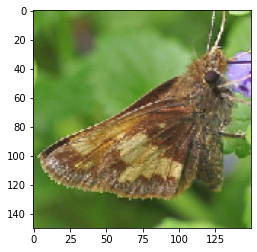

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [6]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax') 
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
rgb_test = model.evaluate(test_generator)
print(rgb_test)

Epoch 1/5
291/291 [==============================] - 56s 140ms/step - loss: 4.3383 - acc: 0.0140 - val_loss: 4.2647 - val_acc: 0.0267
Epoch 2/5
291/291 [==============================] - 39s 134ms/step - loss: 4.1967 - acc: 0.0326 - val_loss: 4.1611 - val_acc: 0.0507
Epoch 3/5
291/291 [==============================] - 37s 129ms/step - loss: 4.0622 - acc: 0.0553 - val_loss: 4.0595 - val_acc: 0.0640
Epoch 4/5
291/291 [==============================] - 37s 128ms/step - loss: 3.9405 - acc: 0.0715 - val_loss: 3.9564 - val_acc: 0.0693
Epoch 5/5
12/12 [==============================] - 1s 75ms/step - loss: 3.7816 - acc: 0.1013
[3.781573534011841, 0.10133333504199982]


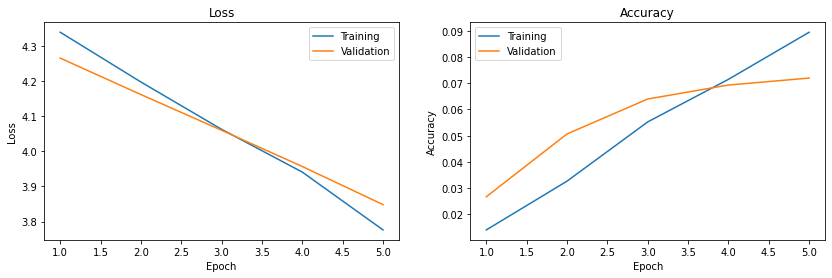

In [7]:
history = rgb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB Norm

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


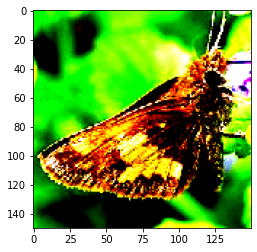

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function=normalize_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=normalize_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(preprocessing_function=normalize_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [9]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb_norm_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax') 
])

rgb_norm_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_norm_history = rgb_norm_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
rgb_norm_test = rgb_norm_model.evaluate(test_generator)
print(rgb_norm_test)

Epoch 1/5
291/291 [==============================] - 42s 140ms/step - loss: 4.4353 - acc: 0.0316 - val_loss: 4.2103 - val_acc: 0.0533
Epoch 2/5
291/291 [==============================] - 43s 147ms/step - loss: 4.1282 - acc: 0.0506 - val_loss: 4.1230 - val_acc: 0.0533
Epoch 3/5
291/291 [==============================] - 48s 164ms/step - loss: 3.9526 - acc: 0.0653 - val_loss: 3.9689 - val_acc: 0.0747
Epoch 4/5
291/291 [==============================] - 47s 162ms/step - loss: 3.7062 - acc: 0.0975 - val_loss: 3.7054 - val_acc: 0.1147
Epoch 5/5
12/12 [==============================] - 1s 93ms/step - loss: 3.4610 - acc: 0.1493
[3.461003541946411, 0.14933332800865173]


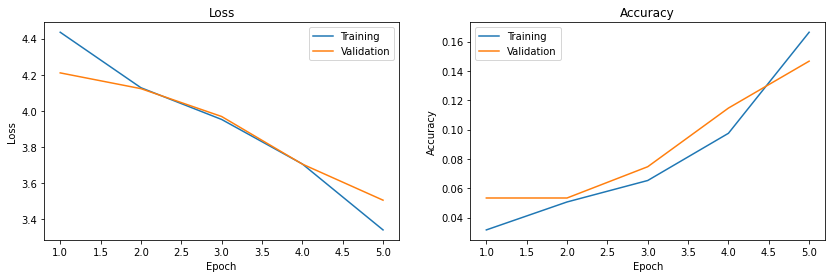

In [10]:
history = rgb_norm_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


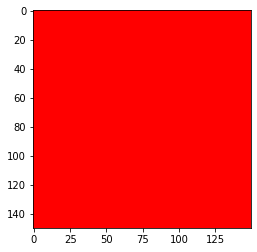

In [11]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    image = normalize_img(image)
    return image

train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [12]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2luv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2luv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2luv_history = rgb2luv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
luv_test = rgb2luv_model.evaluate(test_generator)
print(luv_test)

Epoch 1/5
291/291 [==============================] - 52s 175ms/step - loss: 4.5281 - acc: 0.0173 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 50s 173ms/step - loss: 4.3416 - acc: 0.0202 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 50s 173ms/step - loss: 4.3404 - acc: 0.0196 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 50s 173ms/step - loss: 4.3275 - acc: 0.0196 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 108ms/step - loss: 4.3175 - acc: 0.0133
[4.317532062530518, 0.013333333656191826]


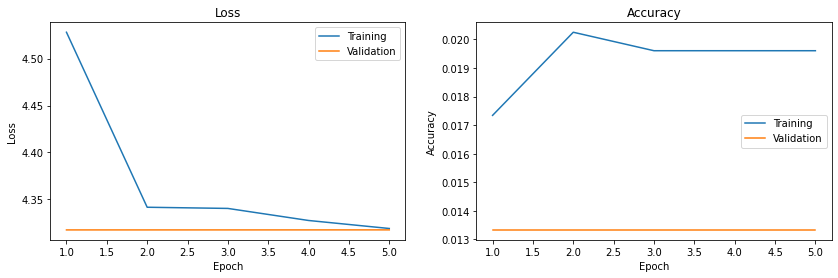

In [13]:
history = rgb2luv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LAB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


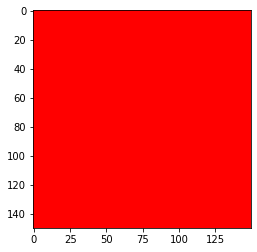

In [14]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    image = normalize_img(image)
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)

validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [15]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2lab_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2lab_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2lab_history = rgb2lab_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
lab_test=rgb2lab_model.evaluate(test_generator)
print(lab_test)

Epoch 1/5
291/291 [==============================] - 51s 172ms/step - loss: 4.5168 - acc: 0.0177 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 50s 171ms/step - loss: 4.3498 - acc: 0.0198 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 50s 171ms/step - loss: 4.3303 - acc: 0.0197 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 50s 170ms/step - loss: 4.3212 - acc: 0.0205 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 102ms/step - loss: 4.3217 - acc: 0.0133
[4.321719169616699, 0.013333333656191826]


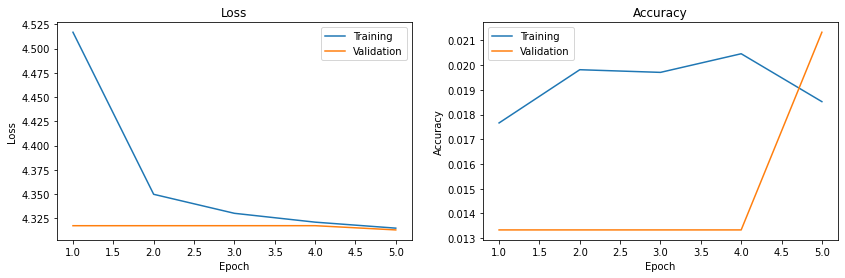

In [16]:
history = rgb2lab_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HSV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


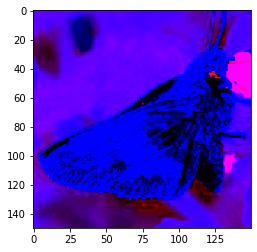

In [17]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image = normalize_img(image)
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [18]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2hsv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hsv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hsv_history = rgb2hsv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hsv_test = rgb2hsv_model.evaluate(test_generator)
print(hsv_test)

Epoch 1/5
291/291 [==============================] - 49s 167ms/step - loss: 4.4305 - acc: 0.0247 - val_loss: 4.2731 - val_acc: 0.0240
Epoch 2/5
291/291 [==============================] - 49s 168ms/step - loss: 4.2323 - acc: 0.0280 - val_loss: 4.2162 - val_acc: 0.0240
Epoch 3/5
291/291 [==============================] - 49s 169ms/step - loss: 4.1465 - acc: 0.0476 - val_loss: 4.1322 - val_acc: 0.0613
Epoch 4/5
291/291 [==============================] - 49s 168ms/step - loss: 3.9555 - acc: 0.0657 - val_loss: 3.9353 - val_acc: 0.0613
Epoch 5/5
12/12 [==============================] - 1s 96ms/step - loss: 3.6369 - acc: 0.1653
[3.6368703842163086, 0.1653333306312561]


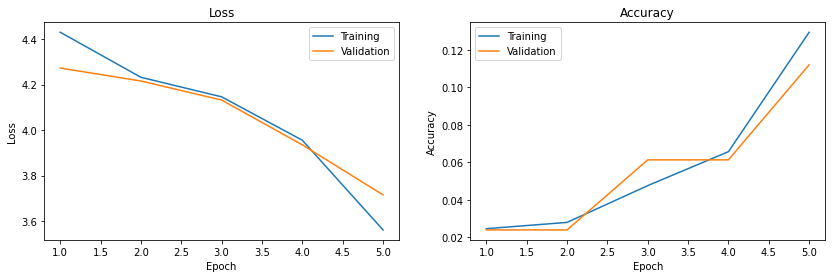

In [19]:
history = rgb2hsv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


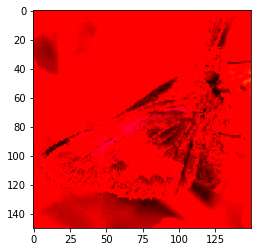

In [20]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image = normalize_img(image)
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [21]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2yuv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2yuv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2yuv_history = rgb2yuv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
yuv_test = rgb2yuv_model.evaluate(test_generator)
print(yuv_test)

Epoch 1/5
291/291 [==============================] - 48s 162ms/step - loss: 4.5423 - acc: 0.0167 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 48s 165ms/step - loss: 4.3266 - acc: 0.0198 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 48s 164ms/step - loss: 4.3234 - acc: 0.0202 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 48s 166ms/step - loss: 4.3196 - acc: 0.0201 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 97ms/step - loss: 4.3175 - acc: 0.0133
[4.317533016204834, 0.013333333656191826]


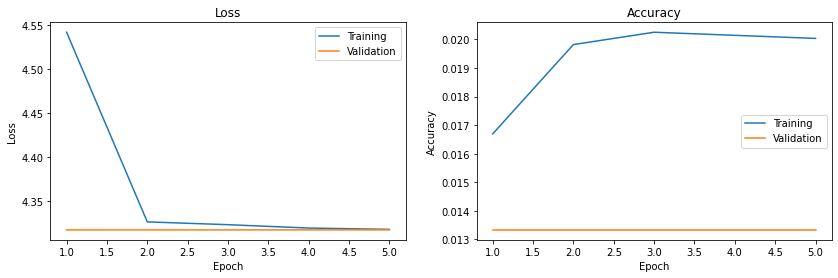

In [22]:
history = rgb2yuv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YCrCb

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


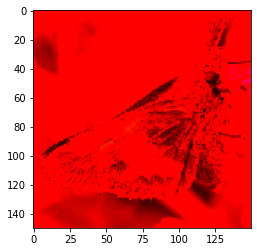

In [23]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    image = normalize_img(image)
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [24]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2ycrcb_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2ycrcb_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2ycrcb_history = rgb2ycrcb_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
ycrcb_test = rgb2ycrcb_model.evaluate(test_generator)
print(ycrcb_test)

Epoch 1/5
291/291 [==============================] - 50s 168ms/step - loss: 4.5426 - acc: 0.0211 - val_loss: 4.2614 - val_acc: 0.0240
Epoch 2/5
291/291 [==============================] - 48s 165ms/step - loss: 4.2531 - acc: 0.0280 - val_loss: 4.2299 - val_acc: 0.0293
Epoch 3/5
291/291 [==============================] - 48s 166ms/step - loss: 4.1607 - acc: 0.0304 - val_loss: 4.0977 - val_acc: 0.0560
Epoch 4/5
291/291 [==============================] - 49s 167ms/step - loss: 3.9720 - acc: 0.0668 - val_loss: 3.9004 - val_acc: 0.0880
Epoch 5/5
12/12 [==============================] - 1s 97ms/step - loss: 3.7357 - acc: 0.1387
[3.7357468605041504, 0.13866665959358215]


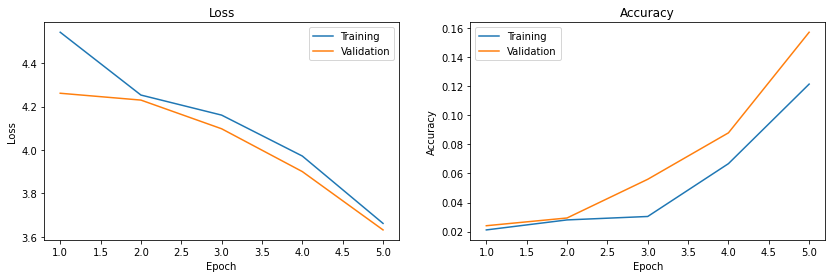

In [25]:
history = rgb2ycrcb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HLS

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


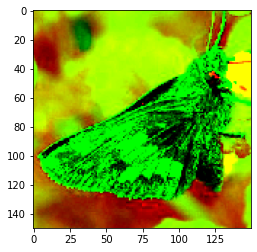

In [26]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image = normalize_img(image)
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [27]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
rgb2hls_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hls_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hls_history = rgb2hls_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hls_test = rgb2hls_model.evaluate(test_generator)
print(hls_test)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


291/291 [==============================] - 49s 165ms/step - loss: nan - acc: 0.0135 - val_loss: nan - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 47s 163ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 47s 162ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 47s 163ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 100ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


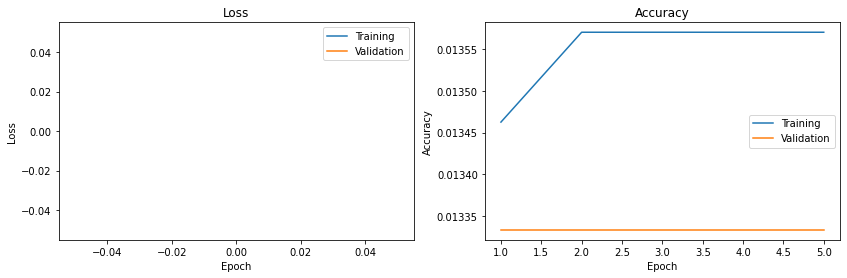

In [28]:
history = rgb2hls_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

## Results

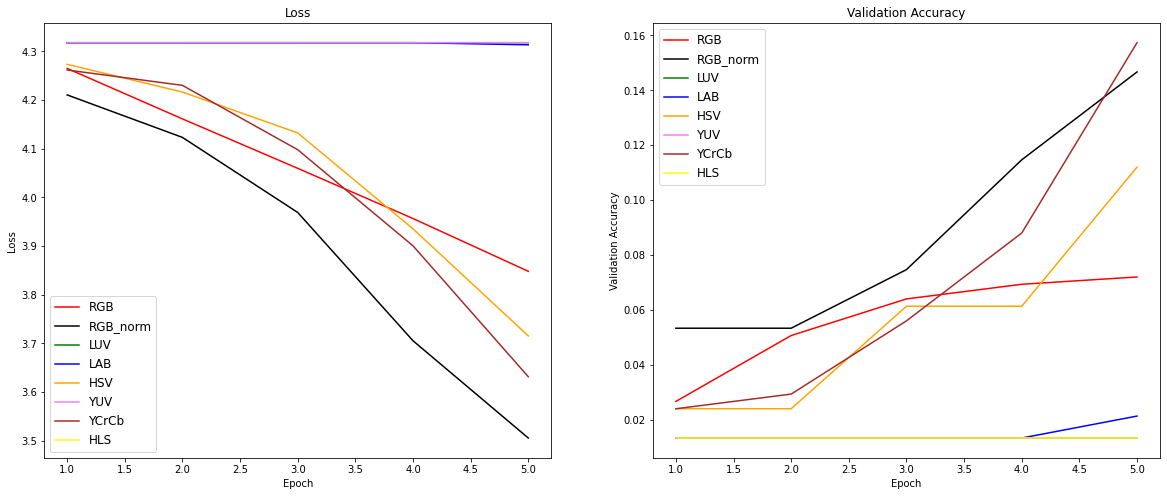

In [29]:
plot_rgb_history = rgb_history.history
plot_rgb_norm_history = rgb_norm_history.history

plot_rgb2luv_history = rgb2luv_history.history
plot_rgb2lab_history = rgb2lab_history.history
plot_rgb2hsvhistory = rgb2hsv_history.history
plot_rgb2yuv_history = rgb2yuv_history.history
plot_rgb2ycrcb_history = rgb2ycrcb_history.history
plot_rgb2hls_history = rgb2hls_history.history

n_epochs = len(history['loss'])

plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1),plot_rgb_history['val_loss'], label='RGB',color='red')
plt.plot(range(1, n_epochs+1),plot_rgb_norm_history['val_loss'], label='RGB_norm',color='black')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_loss'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_loss'], label='LAB',color='blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_loss'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_loss'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_loss'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_loss'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend(fontsize=12)
plt.subplot(1,2,2)



plt.plot(range(1, n_epochs+1),plot_rgb_history['val_acc'], label='RGB',color='Red')
plt.plot(range(1, n_epochs+1),plot_rgb_norm_history['val_acc'], label='RGB_norm',color='black')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_acc'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_acc'], label='LAB',color='Blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_acc'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_acc'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_acc'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_acc'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend(fontsize=12)
plt.show()
